In [1]:
#@markdown # 필요한 라이브러리 설치
#@markdown ### 함수를 사용하기 전에 아래의 Colab 셀을 실행하여 필요한 라이브러리를 설치하고 함수를 정의하십시오.
#@markdown ### "실행" 버튼을 클릭하거나 "Ctrl + Enter" 키보드 단축키를 사용하여 실행할 수 있습니다.
#@markdown
#@markdown 필요한 모듈 가져오기
#@markdown 사전 학습된 모델 경로 정의
#@markdown 사전 학습된 모델에서 안정적 확산 파이프라인 생성
#@markdown 이미지 그리드 생성 함수 정의
#@markdown 자연어 모델 및 확률적 확산을 사용하여 이미지 생성 함수 정의

#@markdown GPU가 활성화되어 있는지 확인하십시오. 그렇지 않으면 오류가 발생합니다.
#@markdown GPU 활성화 여부를 확인하려면 Colab 메뉴 바의 "런타임"으로 이동하여 "런타임 유형 변경"을 선택하고 "하드웨어 가속기" 옵션이 "GPU"로 설정되어 있는지 확인하십시오.

%%capture
!pip install transformers scipy ftfy
!pip install diffusers[torch]
import numpy as np
import torch
from torch import autocast

from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

dir_model = "Jartemio/The_Owl_Characters_V2"

#@markdown 사전 학습된 모델에서 안정적 확산 파이프라인 생성
scheduler = EulerAncestralDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe = StableDiffusionPipeline.from_pretrained(dir_model, custom_pipeline="lpw_stable_diffusion", scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")

from PIL import Image

def image_grid(imgs, rows, cols):
    """
    이미지 목록에서 이미지 그리드를 생성합니다.
    Args:
        imgs (list): PIL 이미지 객체 목록.
        rows (int): 이미지 그리드의 행 수.
        cols (int): 이미지 그리드의 열 수.

    Returns:
        이미지 그리드를 나타내는 PIL 이미지.
    """
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
def generate_images(text, negative_text, steps=20, count=1, input_seed=0, guidance_scale=7.5, image_height=8, image_width=8):
    """
    자연어 모델과 확률적 확산을 사용하여 이미지를 생성합니다.
    Args:
        text (str): 이미지 생성을 위한 입력 텍스트.
        negative_text (str): 이미지 생성을 위한 부정적인 텍스트.
        steps (int): 이미지 생성에 사용되는 추론 단계 수.
        count (int): 이미지 세트가 생성되는 횟수.
        input_seed (int): 이미지 생성에 사용되는 무작위 시드.
        guidance_scale (float): 이미지 생성에 사용되는 지향 스케일.
        image_height (int): 생성된 이미지의 높이.
        image_width (int): 생성된 이미지의 너비.

    Returns:
        생성된 이미지를 나타내는 PIL 이미지 객체 목록.
    """
    image_all = []
    seed_show = []

    for i in range(count):
        prompt = text
        negative_prompt_temp = negative_text

        # 생성된 이미지의 크기를 계산
        hg = (8*8)*image_height 
        wd = (8*8)*image_width

        if input_seed > -1:
            print(f"custom seed to: {input_seed}. Only one image will be generated")
            seed = input_seed
            count = 1
        else:
            seed = np.random.randint(0, 9999999999)
        
        generator = torch.Generator("cuda").manual_seed(int(seed))

        print(f"이미지 {i+1}")
        print(f"시드: {seed}")
        with autocast("cuda"):
            # 안정적 확산 파이프라인과 무작위 시드를 사용하여 이미지 생성
            image = pipe(prompt=prompt, width=wd, height=hg, negative_prompt=negative_prompt_temp, guidance_scale=guidance_scale, num_inference_steps=steps, generator=generator).images

        for index, imageN in enumerate(image):
            # 생성된 이미지 표시
            display(imageN)
            image_all.append(imageN)

        if input_seed > -1:
            return image_all

    return image_all
%%capture


이미지 1
시드: 1667014055


  0%|          | 0/50 [00:00<?, ?it/s]

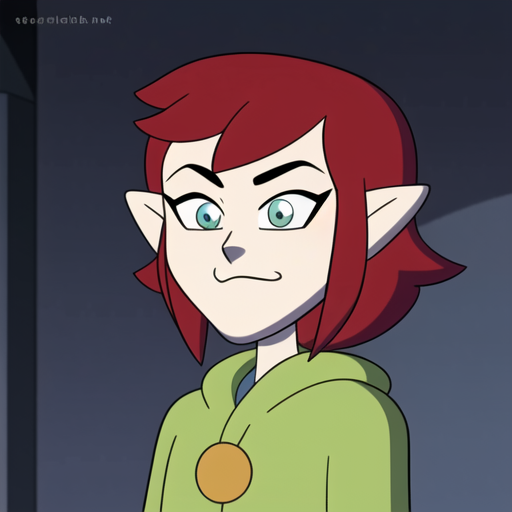

In [4]:
#@markdown # <strong> [Jartemio/The_Owl_Characters_V2](https://huggingface.co/Jartemio/The_Owl_Characters_V2)</strong>

#@markdown ### 다음 태그들은 애니메이션 시리즈 "The Owl House"의 캐릭터들에 해당합니다. 프롬프트에 포함시켜 관련 이미지를 생성할 수 있습니다.

#@markdown - AmityBlight
#@markdown - EdalynClawthorne
#@markdown - EmperorBelos
#@markdown - GusPorter
#@markdown - HunterGoldenGuard
#@markdown - LilithClawthorne
#@markdown - LuzNoceda
#@markdown - RaineWhispers
#@markdown - TheCollector
#@markdown - WillowPark
#@markdown - KingClawthorne

#@markdown ### 입력 매개변수
#@markdown - prompt: 이미지 생성을 위한 입력 텍스트. 이미지를 활성화하기 위해 모델에 "aniscreen" 태그를 포함해야 합니다.
#@markdown - prompt_negative: 이미지 생성을 위한 부정적인 텍스트.
#@markdown - steps: 이미지 생성에 사용되는 추론 단계 수 (값이 -1보다 크면 해당 시드로 하나의 이미지만 생성됩니다). 최소 값: 10. 최대 값: 500. 증가: 10.
#@markdown - tiros_count: 이미지 세트가 생성되는 횟수.
#@markdown - input_seed: 이미지 생성에 사용되는 무작위 시드. 최소 값: 0.
#@markdown - guidance_scale: 이미지 생성에 사용되는 지향 스케일. 최소 값: 0.0.
#@markdown - image_height: 생성된 이미지의 높이. 최소 값: 2. 최대 값: 12. 증가: 1.
#@markdown - image_width: 생성된 이미지의 너비. 최소 값: 2. 최대 값: 12. 증가: 1.

prompt = "aniscreen, 1girl, red hair, upper body" #@param {type:"string"}
prompt_negative = "worst quality, bad quality, text, signature, watermark, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, poorly drawn face, mutation, disfigured, messy drawing, broken legs, nsfw" #@param {type:"string"}
steps = 50 #@param {type:"integer", min:10, max:500, step:10}
tiros_count = 1 #@param {type:"integer"}
input_seed = -1 #@param {type:"integer", min:-1}
guidance_scale = 7.5 #@param {type:"number", min:0.0}
image_height = 8 #@param {type:"slider", min:2, max:12, step:1}
image_width = 8 #@param {type:"slider", min:2, max:12, step:1}

# 이전에 정의된 매개변수를 사용하여 이미지 생성

if tiros_count > 0:
    image_all = generate_images(prompt, prompt_negative, steps, tiros_count, input_seed, guidance_scale, image_height, image_width)
    
    n_images = len(image_all)
    n_cols = min(n_images, 3)
    n_rows = int(np.ceil(n_images / n_cols))
    grid_width = image_width * 64 * n_cols
    grid_height = image_height * 64 * n_rows

    # 그리드를 위한 큰 PIL 이미지 생성
    grid = Image.new('RGB', size=(grid_width, grid_height))

    # 각 생성된 이미지를 그리드에 복사
    for i, img in enumerate(image_all):
        col = i % n_cols
        row = i // n_cols
        x = col * image_width * 64
        y = row * image_height * 64
        grid.paste(img, box=(x, y))
        
if tiros_count > 1:
    display(grid)